A Social Media Influencer collected data on Facebook friend requests and used
a supervised algorithm to predict whether a user would accept a friend request or
not. 
    - Note : Use only Dask and Use MLflow

In [1]:
import dask
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.xgboost import XGBClassifier
import mlflow
import mlflow.xgboost

from dash import dcc
import dash as html
import networkx as nx
import warnings
warnings.filterwarnings("ignore")

c:\Users\arunk\ineuron-assignments\ASSESSMENT COMPLETION\Machine_learning_Assessment\env\lib\site-packages\dask_xgboost\__init__.py:7: UserWarning: Dask-XGBoost has been deprecated and is no longer maintained. The functionality of this project has been included directly in XGBoost. To use Dask and XGBoost together, please use ``xgboost.dask`` instead https://xgboost.readthedocs.io/en/latest/tutorials/dask.html.
  warnings.warn(


In [2]:
train_df = dd.read_csv('train.csv').persist()
test_df = dd.read_csv('test.csv')
benchmark_df = dd.read_csv('random_benchmark.csv')
bfs_df = dd.read_csv('bfs_benchmark.csv')


In [3]:
print(len(train_df))
train_df.head(5)
# train_df.info()

9437519


,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [4]:
benchmark_df.head(1)

,source_node,destination_nodes
0,20,816199 1036232 1492208 1562402 816332 1533091 ...


In [5]:
bfs_df.tail(5)

,source_node,destination_nodes
262583,1862181,544347 1185839 1837776 92467 155267 1380056 10...
262584,1862185,154766 1792884 1138385 305349 1834567 131819 9...
262585,1862187,783777 304713 926352 402129 1370985 639472 993...
262586,1862207,834649 14010 1288784 1599563 1555359 789121 17...
262587,1862213,890229 269968 393599 131814 1026531 572928 147...


In [6]:
train_df.isnull().sum().compute()

source_node         0
destination_node    0
dtype: int64

In [7]:
train_df.isna().any().compute()

source_node         False
destination_node    False
dtype: bool

In [8]:
train_df.drop_duplicates(inplace=True).compute()

0    None
dtype: object

In [9]:
train_df.to_csv("train_woheader.csv",header=False,index=False)

['c:\\Users\\arunk\\ineuron-assignments\\ASSESSMENT COMPLETION\\Machine_learning_Assessment\\Advance_question_1\\train_woheader.csv\\0.part',
 'c:\\Users\\arunk\\ineuron-assignments\\ASSESSMENT COMPLETION\\Machine_learning_Assessment\\Advance_question_1\\train_woheader.csv\\1.part']

train_df.source_node.value_counts().compute()
from dask.distributed import Client

from dask_glm import estimators, algorithms, regularizers,utils, get_distribution



In [10]:

g = nx.DiGraph()

# List of partitioned files
partitioned_files = ['0.part', '1.part']

# Iterate over each partitioned file
for file_name in partitioned_files:
    # Read the partitioned file
    file_path = "./train_woheader.csv/" + file_name  # Adjust the file path if necessary
    partition_graph = nx.read_edgelist(file_path, delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    
    # Merge the partition graph into the main graph
    g = nx.compose(g, partition_graph)


## EDA

In [11]:
No_of_unique_persons = len(g.nodes())
print(No_of_unique_persons)
No_of_unique_persons - len(train_df)

1862220


-7575299

#### No of followers for each person

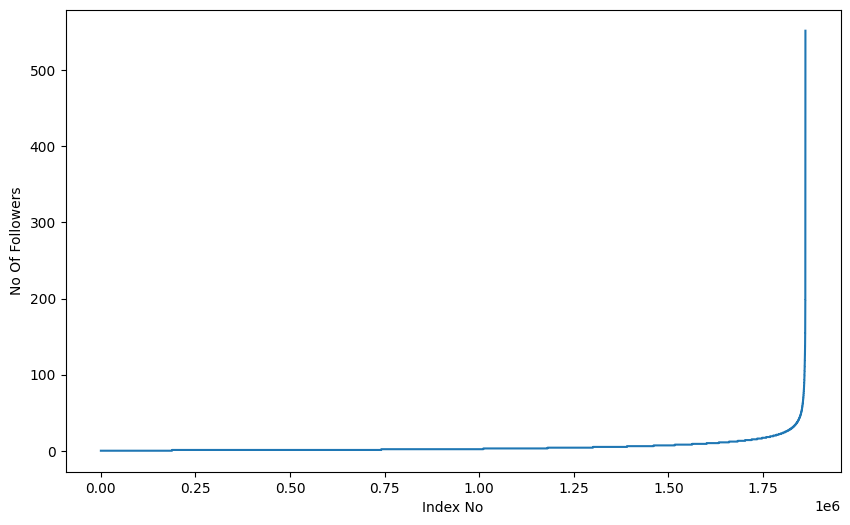

In [12]:
import matplotlib.pyplot as plt 

indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

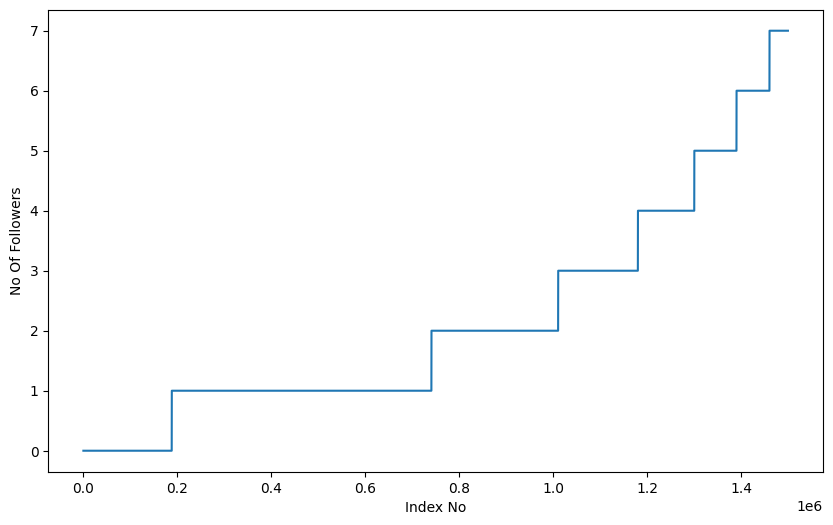

In [13]:
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

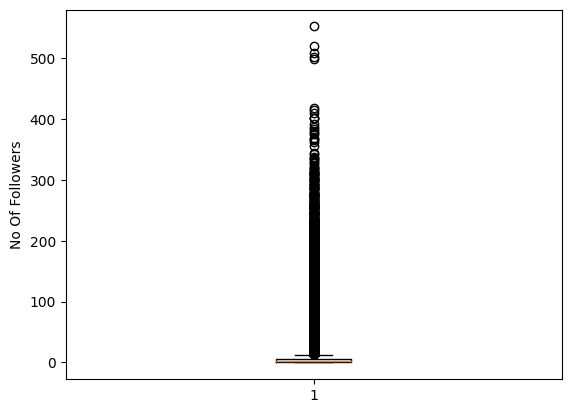

In [14]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of Followers')
plt.show()

In [15]:
import numpy as np
### 90-100 percentile

for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [16]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


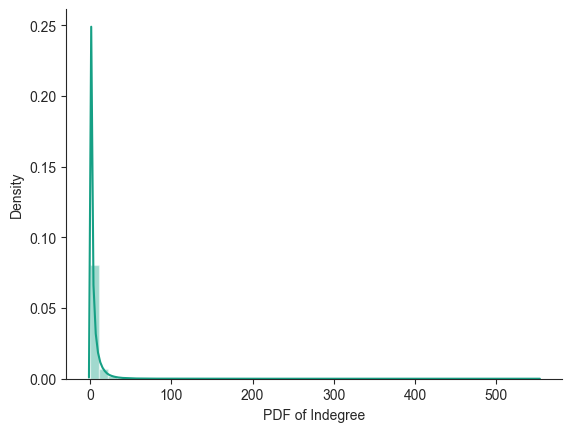

In [17]:
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF of Indegree')
sns.despine()
# plt.show()

#### No of people each person is following

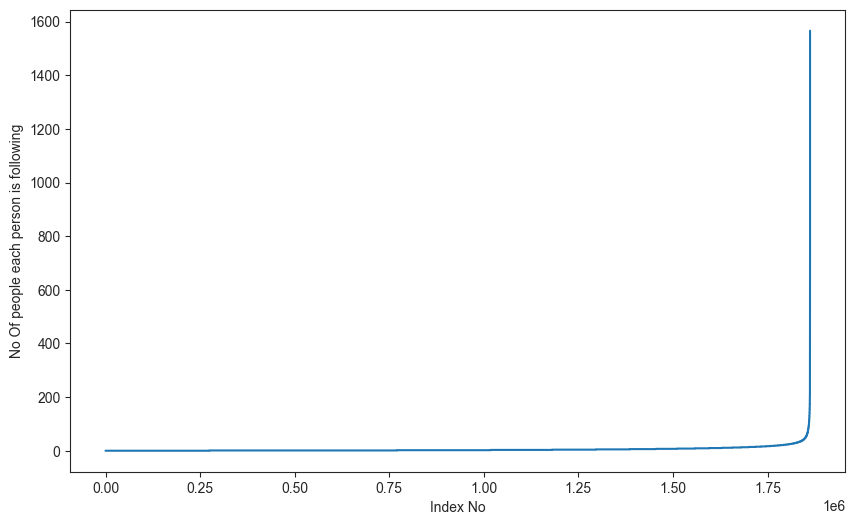

In [18]:
outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

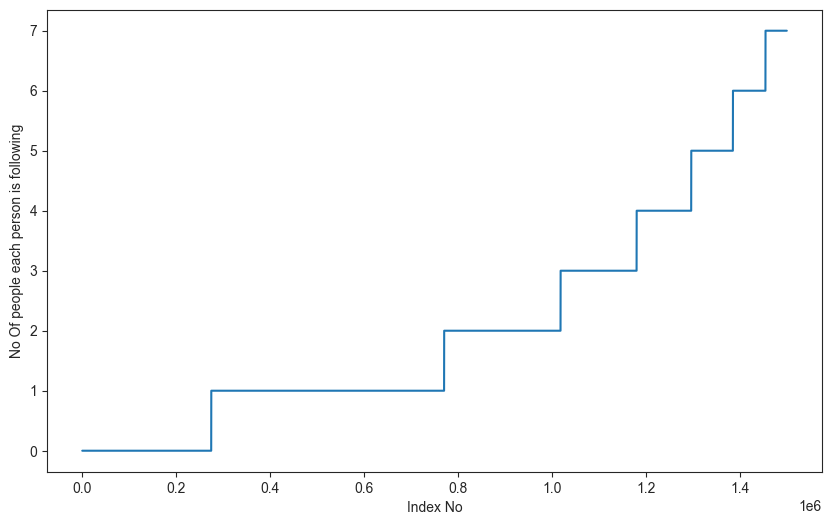

In [19]:
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following')
plt.show()

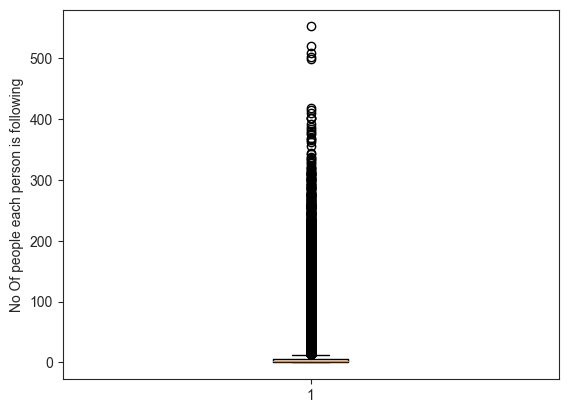

In [20]:
plt.boxplot(indegree_dist)
plt.ylabel('No Of people each person is following')
plt.show()

In [21]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree_dist,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [22]:
### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree_dist,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


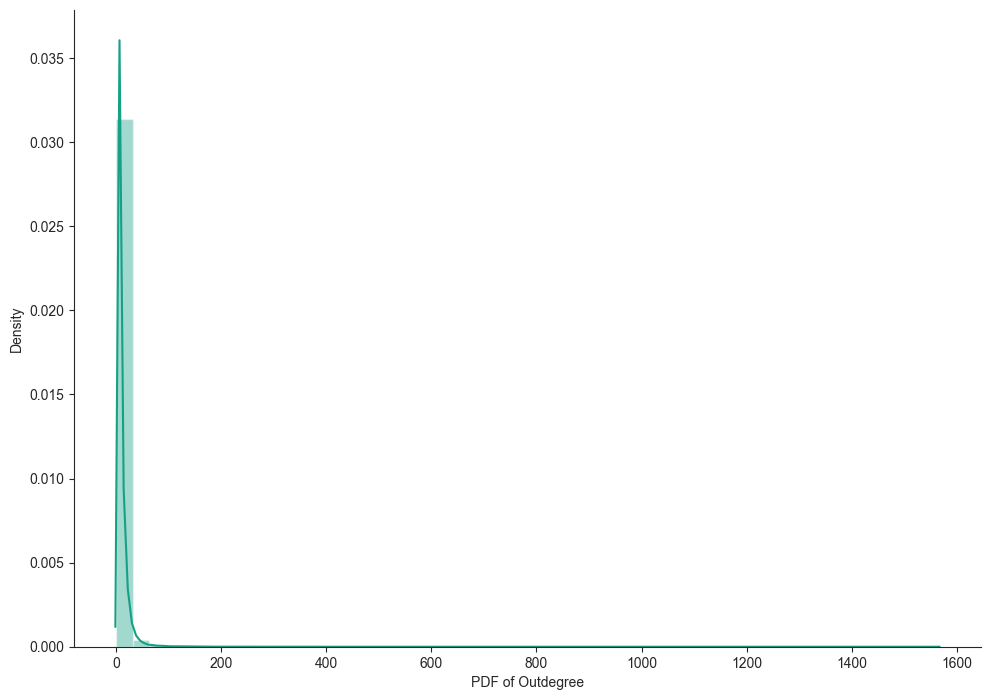

In [23]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF of Outdegree')
sns.despine()

In [24]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree_dist)==0),'and % is', sum(np.array(outdegree_dist)==0)*100/len(outdegree_dist) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [25]:
print('No of persons having zero followers are' ,sum(np.array(indegree_dist)==0),'and % is',sum(np.array(indegree_dist)==0)*100/len(indegree_dist) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [26]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not following anyone and also not having any followers are',count)

No of persons those are not following anyone and also not having any followers are 0


#### Both Followers + Following

In [27]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

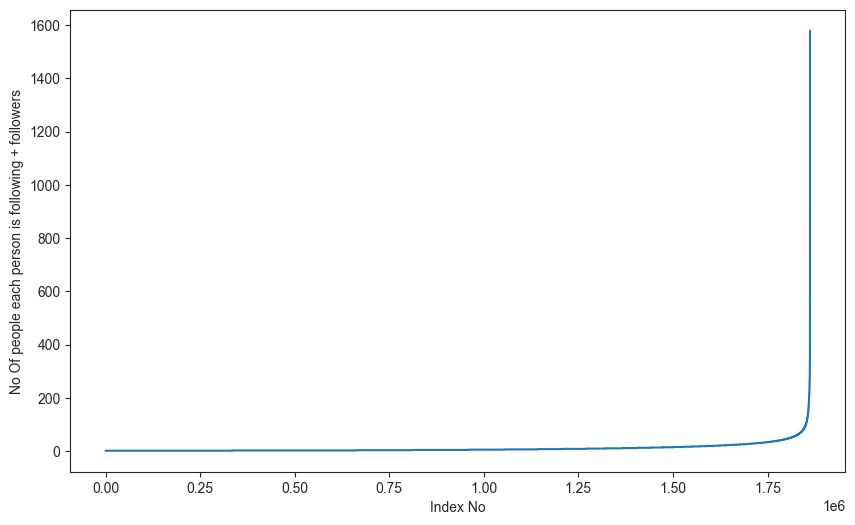

In [28]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

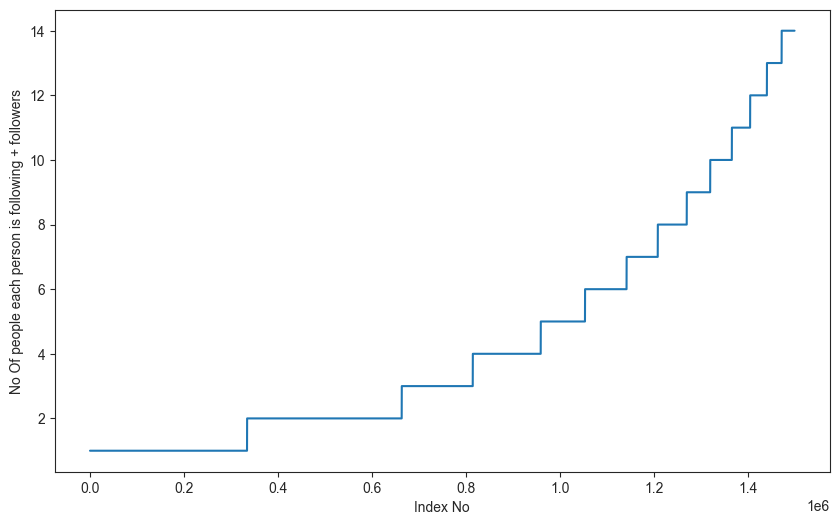

In [29]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [30]:
### 90-100 percentile
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree_sort,90+i))

### 99-100 percentile
for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree_sort,99+(i/100)))

print('Min of no of followers + following is',in_out_degree.min())
print(np.sum(in_out_degree==in_out_degree.min()),' persons having minimum no of followers + following')
print('Max of no of followers + following is',in_out_degree.max())
print(np.sum(in_out_degree==in_out_degree.max()),' persons having maximum no of followers + following')
print('No of persons having followers + following less than 10 are',np.sum(in_out_degree<10))
print('No of weakly connected components',len(list(nx.weakly_connected_components(g))))
count=0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print('weakly connected components with 2 nodes',count)

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0
99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0
Min of no of followers + following is 1
334291  persons having minimum no of followers + following
Max of no of followers + following is 1579
1  persons having maximum no of followers + following
No of persons having followers + following less than 10 are 1320326
No of weakly connected components 45558
weakly connected components with 2 nodes 32195


# Classification
    - Generating some edges which are not present in graph for supervised learning
        - Generated Bad links from graph which are not in graph and whose shortest path is greater than 2.

In [ ]:
%%time
import os
###generating bad edges from given graph
import random
import csv
import cloudpickle as pickle
partitioned_files = ['0.part', '1.part']

if not os.path.isfile('missing_edges_final.p'):
    #getting all set of edges
    edges = dict()
    for file_name in partitioned_files:
        file_path = "./train_woheader.csv/" + file_name

        r = csv.reader(open(file_path,'r'))
        
        for edge in r:
            edges[(edge[0], edge[1])] = 1

    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('missing_edges_final.p','rb'))

#### Train Test Split

In [ ]:
import os
if (not os.path.isfile('train_pos_after_eda.csv')) and (not os.path.isfile('test_pos_after_eda.csv')):
    #reading total data df
    df_pos =dd.read_csv('train.csv')
    df_neg = dd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("Number of nodes in the graph with edges", df_pos.shape[0])
    print("Number of nodes in the graph without edges", df_neg.shape[0])
    
    #Trian test split 
    #Spiltted data into 80-20 
    #positive links and negative links seperatly because we need positive training data only for creating graph 
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)
    
    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0],"=",y_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0],"=", y_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0],"=",y_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0],"=",y_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('train_pos_after_eda.csv',header=False, index=False)
    X_test_pos.to_csv('test_pos_after_eda.csv',header=False, index=False)
    X_train_neg.to_csv('train_neg_after_eda.csv',header=False, index=False)
    X_test_neg.to_csv('test_neg_after_eda.csv',header=False, index=False)
else:
    #Graph from Traing data only 
    del missing_edges
if (os.path.isfile('train_pos_after_eda.csv')) and (os.path.isfile('test_pos_after_eda.csv')):        
    train_graph=nx.read_edgelist('train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    test_graph=nx.read_edgelist('test_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
    print(nx.info(test_graph))

    # finding the unique nodes in the both train and test graphs
    train_nodes_pos = set(train_graph.nodes())
    test_nodes_pos = set(test_graph.nodes())

    trY_teY = len(train_nodes_pos.intersection(test_nodes_pos))
    trY_teN = len(train_nodes_pos - test_nodes_pos)
    teY_trN = len(test_nodes_pos - train_nodes_pos)

    print('no of people common in train and test -- ',trY_teY)
    print('no of people present in train but not present in test -- ',trY_teN)

    print('no of people present in test but not present in train -- ',teY_trN)
    print(' % of people not there in Train but exist in Test in total Test data are {} %'.format(teY_trN/len(test_nodes_pos)*100))

In [ ]:
#final train and test data sets
if (not os.path.isfile('train_after_eda.csv')) and \
(not os.path.isfile('test_after_eda.csv')) and \
(not os.path.isfile('data/train_y.csv')) and \
(not os.path.isfile('data/test_y.csv')) and \
(os.path.isfile('train_pos_after_eda.csv')) and \
(os.path.isfile('test_pos_after_eda.csv')) and \
(os.path.isfile('train_neg_after_eda.csv')) and \
(os.path.isfile('test_neg_after_eda.csv')):
    
    X_train_pos = dd.read_csv('train_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_pos = dd.read_csv('test_pos_after_eda.csv', names=['source_node', 'destination_node'])
    X_train_neg = dd.read_csv('train_neg_after_eda.csv', names=['source_node', 'destination_node'])
    X_test_neg = dd.read_csv('test_neg_after_eda.csv', names=['source_node', 'destination_node'])

    print('='*60)
    print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
    print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
    print('='*60)
    print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
    print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg,ignore_index=True)
    y_train = np.concatenate((y_train_pos,y_train_neg))
    X_test = X_test_pos.append(X_test_neg,ignore_index=True)
    y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
    X_train.to_csv('train_after_eda.csv',header=False,index=False)
    X_test.to_csv('test_after_eda.csv',header=False,index=False)
    dd.DataFrame(y_train.astype(int)).to_csv('data/train_y.csv',header=False,index=False)
    dd.DataFrame(y_test.astype(int)).to_csv('data/test_y.csv',header=False,index=False)
print("Data points in train data",X_train.shape)
print("Data points in test data",X_test.shape)
print("Shape of target variable in train",y_train.shape)
print("Shape of target variable in test", y_test.shape)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from dask_ml.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
mlflow.start_run()
mlflow.xgboost.log_model(model)
mlflow.end_run()

